# Problem Description


We will be working on a Kaggle Competition in this notebook. This competition is about predicting the house prices in the area of Ames, Iowa. As house prices are a continuous variable, so this problem falls under the Regression Area. These lines have been taken from the Competition's Description. 

"This is a perfect competition for Data Science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition."

# Loading the libraries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from IPython.display import HTML
import base64  

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from scipy.stats import skew
from scipy.stats.stats import pearsonr

# Loading the datasets

<p>We have the following 4 files provided by the competition organizers</p>

<ol>
<li>train.csv - the training set</li>
<li>test.csv - the test set</li>
<li>data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here</li>
<li>sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms</li>
</ol>

We will be reading the dataset directly from the github repository, built for the datasets being used in the course. 

In [108]:
train = pd.read_csv("/usr/local/notebooks/datasets/Regression_Competition_Dataset/train.csv")
test = pd.read_csv("/usr/local/notebooks/datasets/Regression_Competition_Dataset/test.csv")

In [109]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We will be looking into the Description of the columns as we move ahead in the lesson.

In [111]:
'''Dimensions of train and test data'''
print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

Dimensions of train data: (1460, 81)
Dimensions of test data: (1459, 80)


In [112]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [113]:
test.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [114]:
"""Let's merge the train and test data and inspect the data type"""
merged = pd.concat([train, test], axis=0, sort=True)
print(merged.dtypes.value_counts())
print('Dimensions of data:', merged.shape)

object     43
int64      26
float64    12
dtype: int64
Dimensions of data: (2919, 81)


<p>We can see from above </p>
<ul>
<li>There are 1460 instances in the train dataset</li>
<li>There are 1459 instances in the test dataset</li>
<li>There are 81 columns in the train dataset with one column "SalePrice", which is the target to be predicted.</li>
<li>There are 80 columns in the test dataset. It doesn't contains the "SalePrice" column.</li>
<li>43 variables have the type object indicating that they are categorical variables which can be nominal or ordinal.</li>
<li>26 variables have the type int64 indicating they are numerical variables.</li>
<li>12 variables have the type float64 indicating they are numerical variables.</li>
</ul>

# Numerical Variables Analysis

In [115]:
# Extracting Numerical Columns 
del train["Id"] # "Id" variable is a unique id 
df_num = train.select_dtypes(include = ['int64', 'float64'])
print("----------------------")
print(df_num.columns.values)
print("----------------------")
print(f"The number of Numerical Variables(Excluding the Id Column) are {len(df_num.columns.values)}")
print("----------------------")

----------------------
['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']
----------------------
The number of Numerical Variables(Excluding the Id Column) are 37
----------------------


## Histograms  

<p>We will be plotting historgrams in two phases to avoid the clutering of labels. Histograms comes under the Univariate analysis of the variables.</p>

array([[<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'3SsnPorch'}>,
        <AxesSubplot:title={'center':'ScreenPorch'}>],
       [<AxesSubplot:title={'center':'MoSold'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

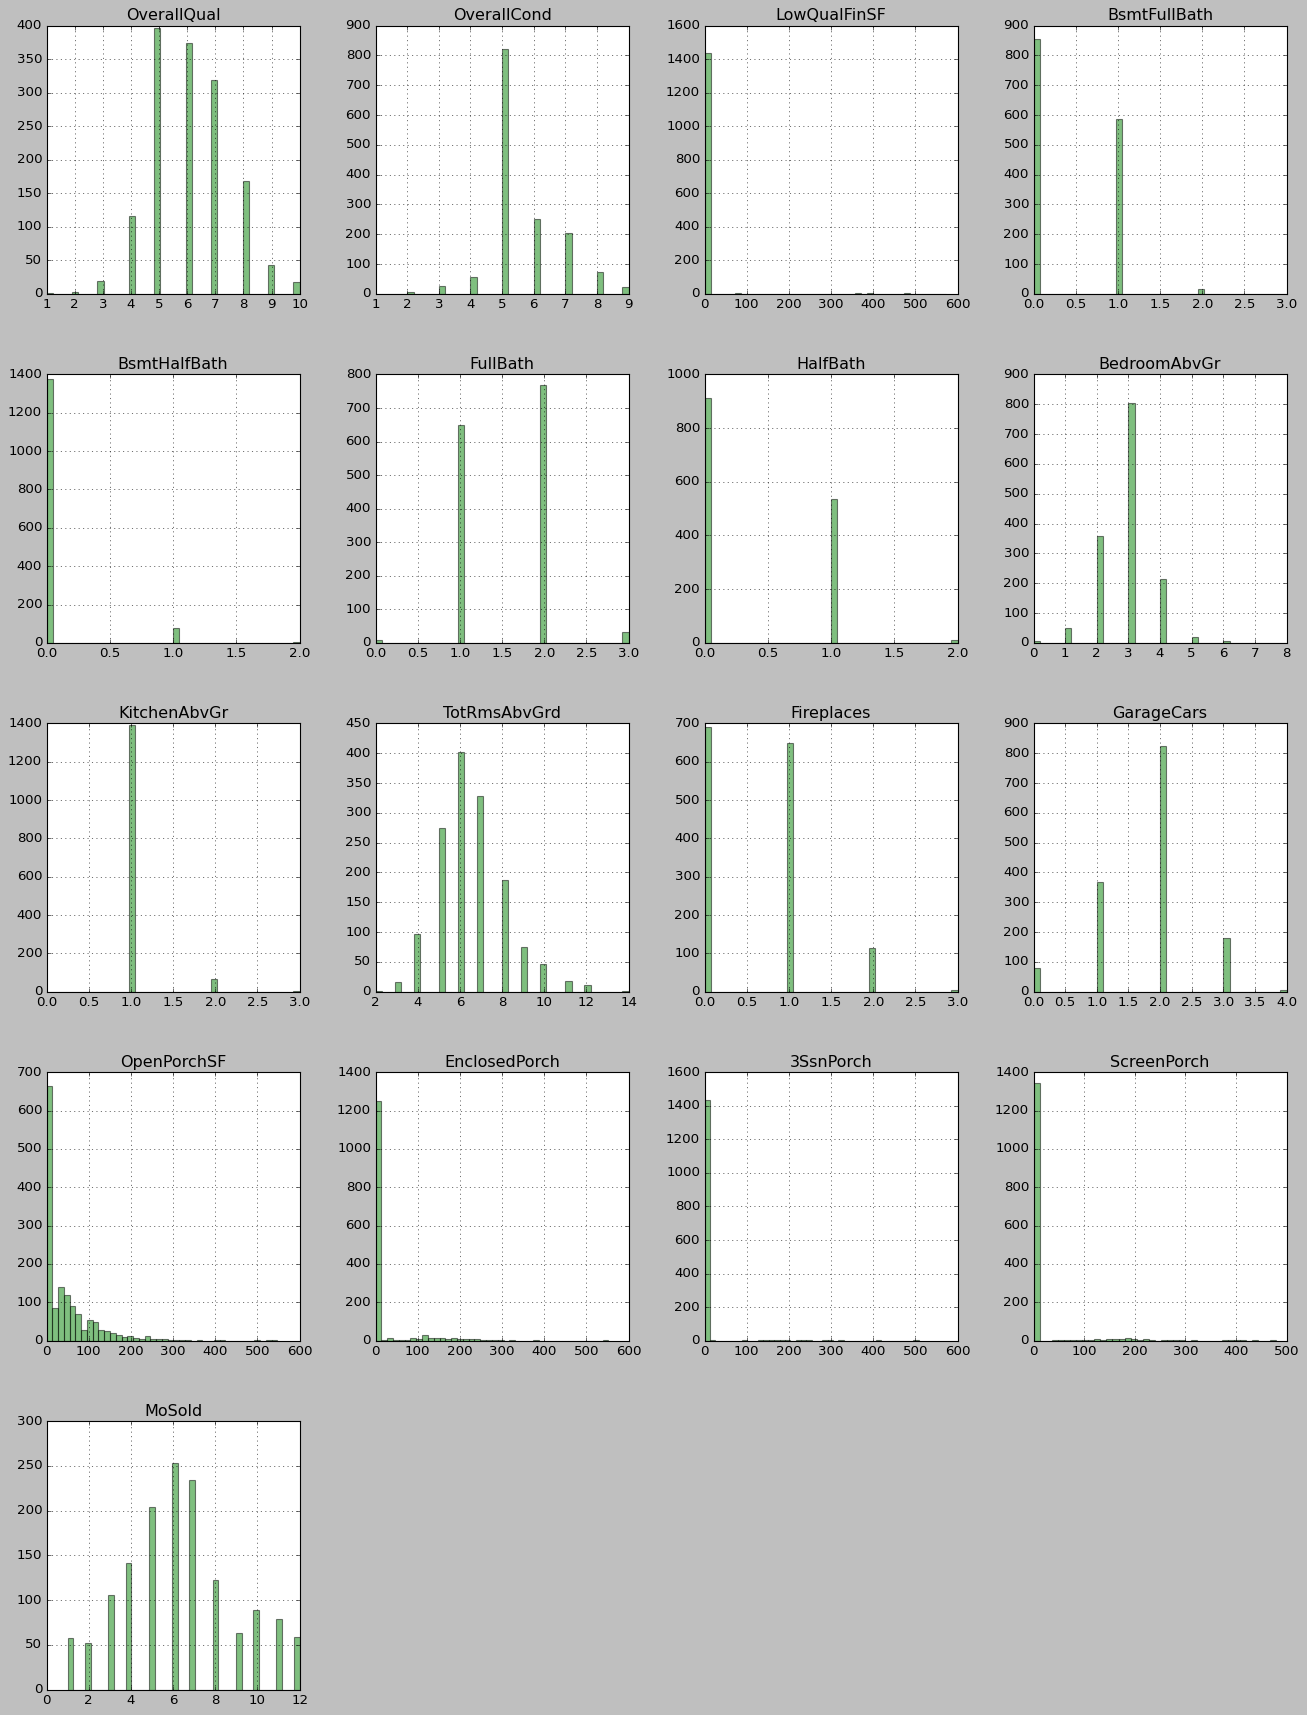

In [116]:
%matplotlib inline
plt.style.use('classic')

first_phase_histograms = ["OverallQual", "OverallCond", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
 "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "OpenPorchSF", "EnclosedPorch",
 "3SsnPorch", "ScreenPorch", "MoSold"]

df_num[first_phase_histograms].hist(figsize=(20, 26), bins=40, color = 'green',alpha=0.5)


array([[<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'GarageYrBlt'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'YrSold'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'PoolArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
 

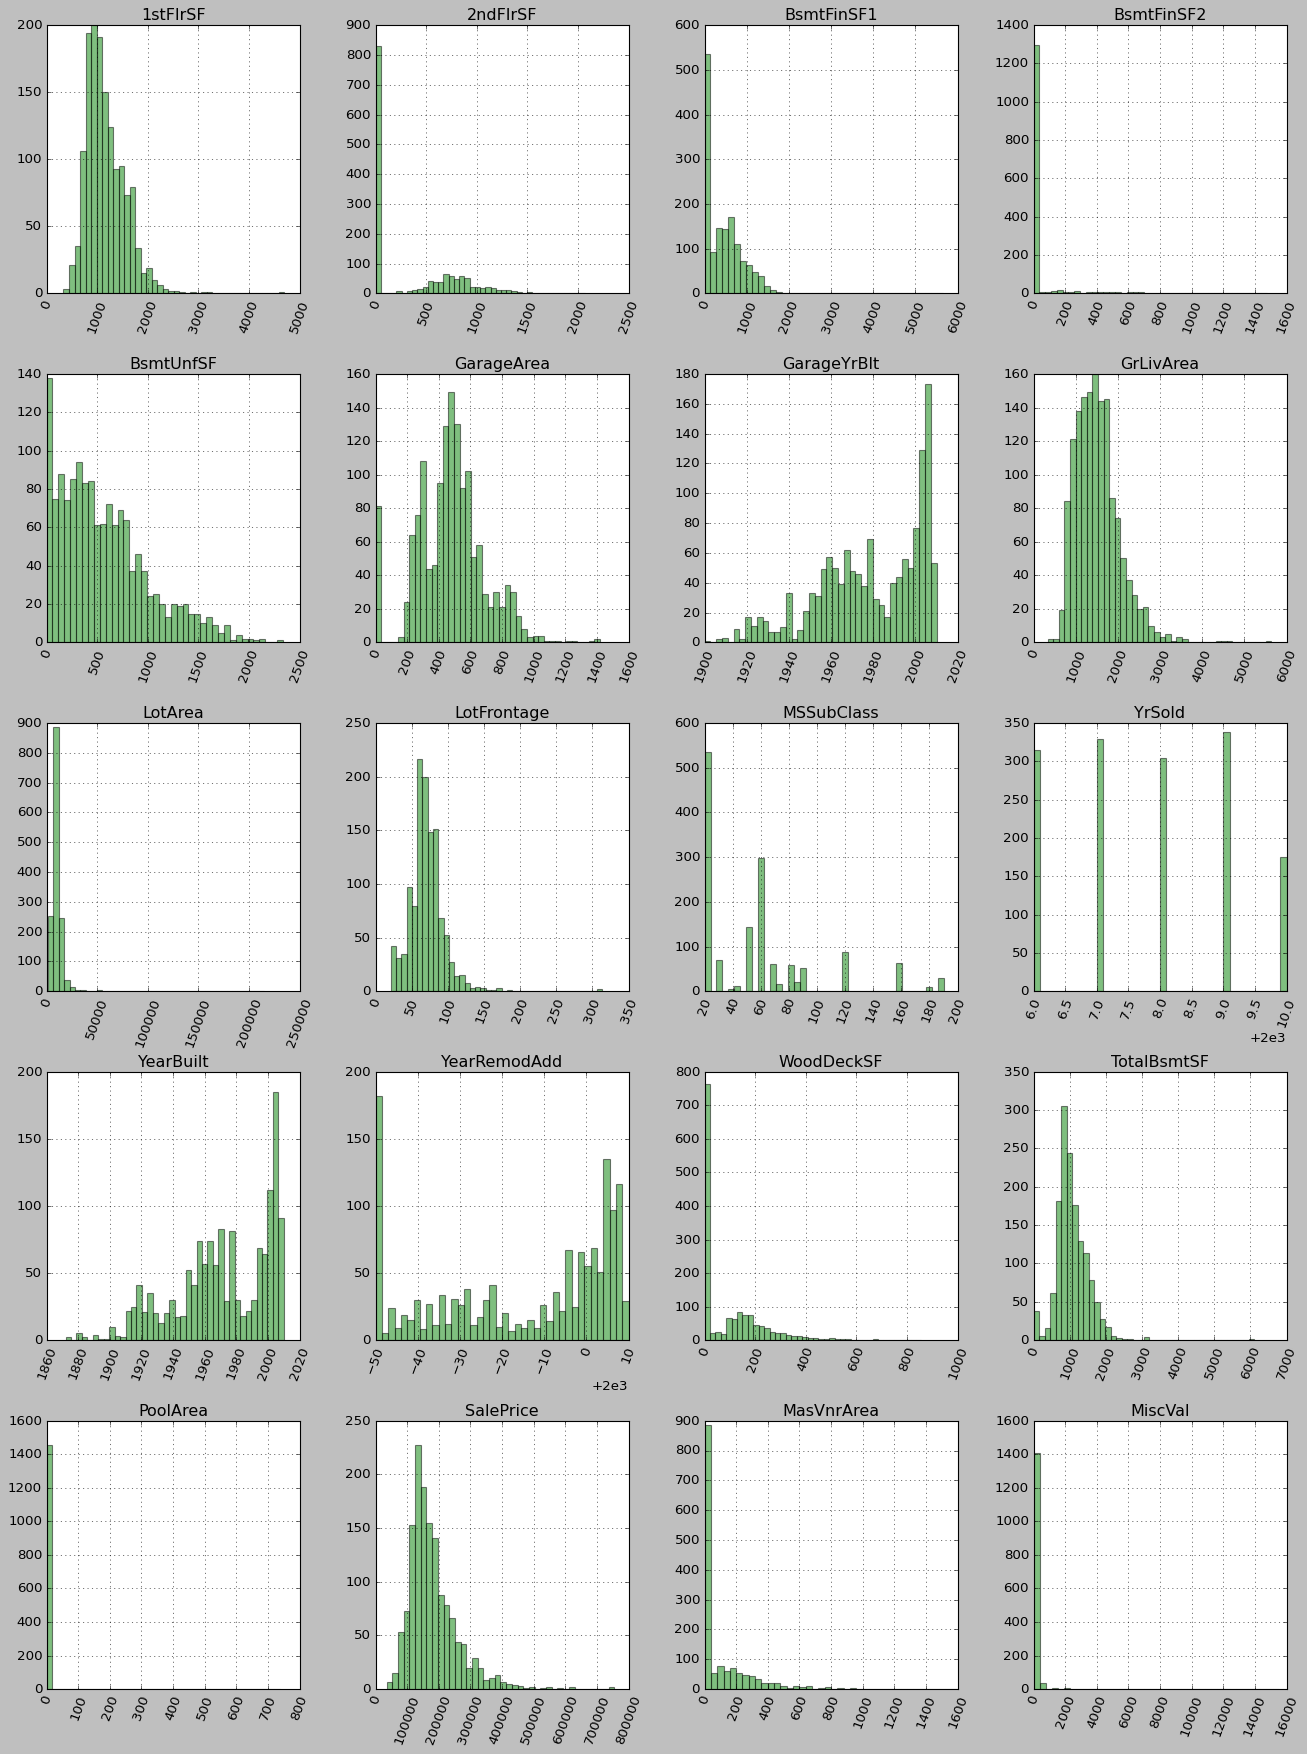

In [117]:
second_phase_histograms = ["1stFlrSF", "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "GarageArea", "GarageYrBlt", "GrLivArea", "LotArea", "LotFrontage", "MSSubClass", "YrSold", "YearBuilt", "YearRemodAdd", "WoodDeckSF", "TotalBsmtSF", "PoolArea", "SalePrice", "MasVnrArea", "MiscVal"]
df_num[second_phase_histograms].hist(figsize=(20, 26), bins=40, xrot=70, color = 'green',alpha=0.5)

## Findings

1. Variables like "MoSold", "OverallQual", "TotRmsAbvGrd" looks more like Gaussian Variables. Variable description is given as below.

* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

2. Features such as "1stFlrSF", "TotalBsmtSF", "LotFrontage", "GrLiveArea" seems to share a similar distribution to the one we have with "SalePrice". <b>This is a Key Indication that they can help in Modelling</b>. Variable description is given as below. 

* 1stFlrSF: First Floor square feet

* TotalBsmtSF: Total square feet of basement area

* LotFrontage: Linear feet of street connected to property

* GrLivArea: Above grade (ground) living area square feet

* SalePrice: It is the SalePrice of the house.

3. <b>Applying Numerical Transformations like Log Transformations might help in improving the performance of the model as many variables don't obey the Gaussian Distribution.</b>






## Scatter Plots
<p>Scatter Plot comes under the Bivariate analysis. It shows the relationship between the variables. We will be plotting the scatter plot between the input variables and the target variable "SalePrice" which is to be predicted. We won't be plotting the scatter plot for the following input numerical variables 'MiscVal', 'MoSold', 'YrSold' where </p>

* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold (MM)
* YrSold: Year Sold (YYYY)



In [118]:
numeric_columns = ["OverallQual", "OverallCond", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
 "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "OpenPorchSF", "EnclosedPorch",
 "3SsnPorch", "ScreenPorch", "1stFlrSF", "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "GarageArea", "GarageYrBlt",
  "GrLivArea", "LotArea", "LotFrontage", "MSSubClass", "YearBuilt", "YearRemodAdd", "WoodDeckSF", "TotalBsmtSF", "PoolArea", "MasVnrArea"]

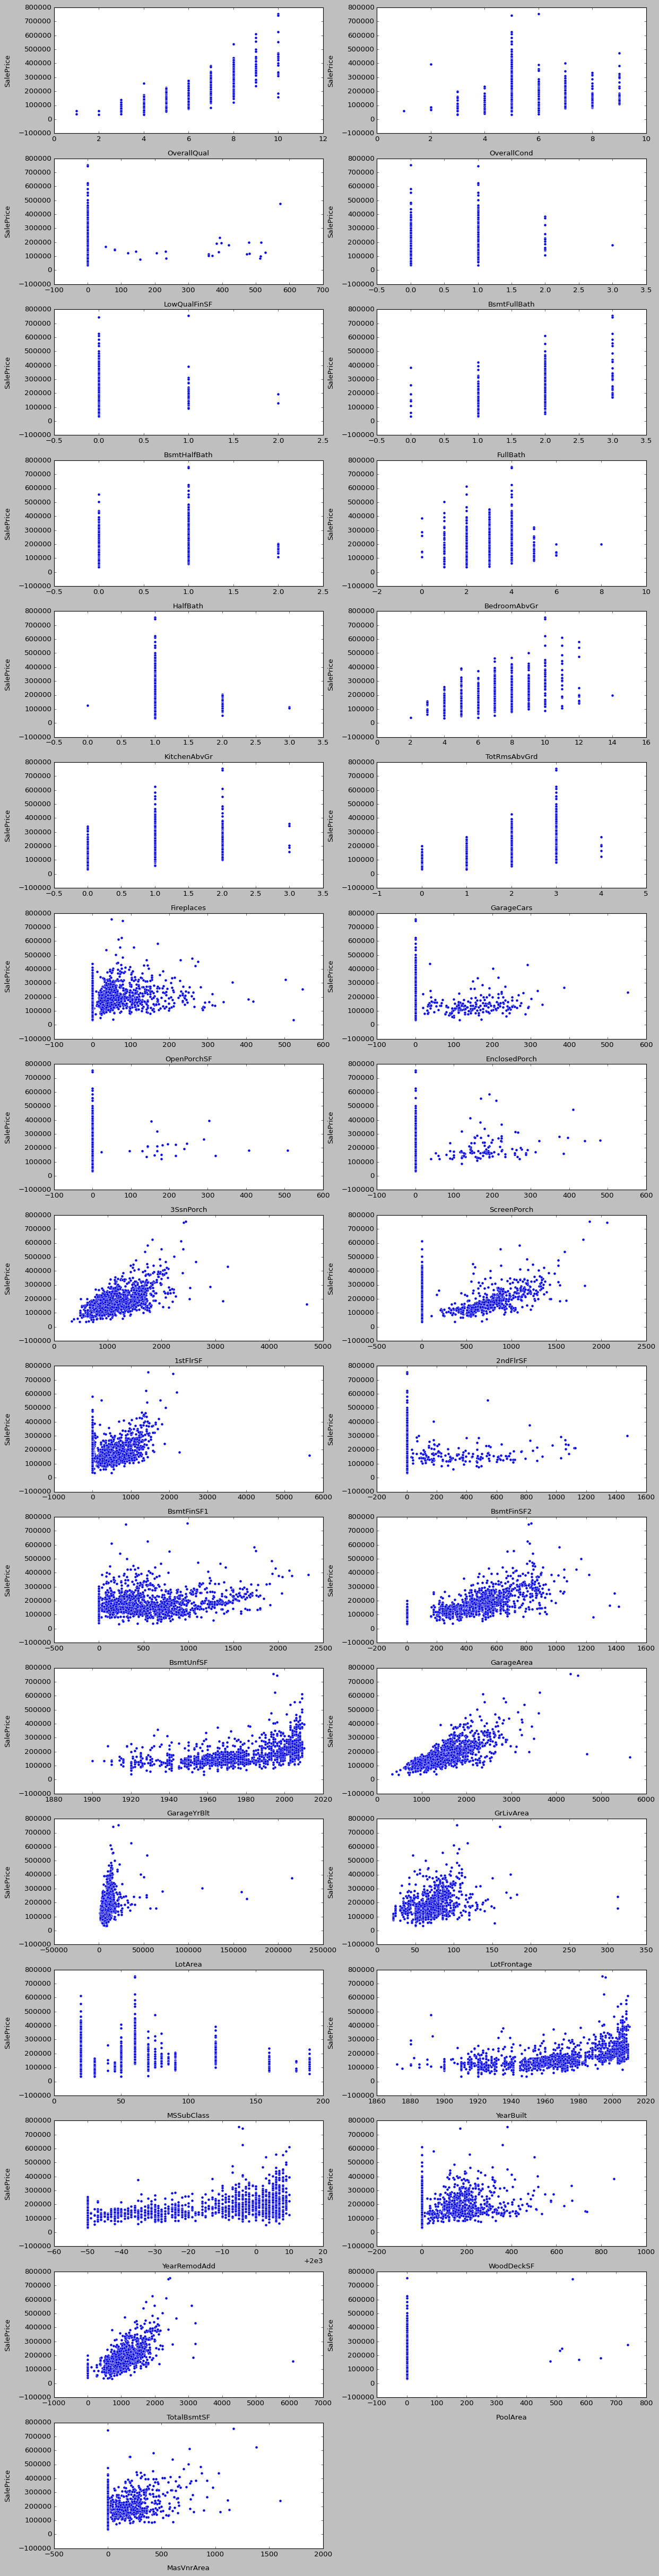

In [119]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18, 146))
for i, feature in enumerate(list(df_num[numeric_columns]), 1):
    plt.subplot(len(list(numeric_columns)), 2, i)
    sns.scatterplot(x=feature, y='SalePrice', data=df_num)
    plt.xlabel('{}'.format(feature), size=12,labelpad=12.5)
    plt.ylabel('SalePrice', size=12, labelpad=12.5)
plt.show()

## Findings

1. We can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the house. For example LowQualFinSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, 2ndFlrSF, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, GarageArea, WoodDeckSF, TotalBsmtSF, PoolArea and MasVnrArea. All are having some data points located on x=0, indicating missing values in the respective columns. Below are the description of the Variables for a given house.

* LowQualFinSF: Low quality finished square feet (all floors)
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* 2ndFlrSF: Second floor square feet
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* GarageArea: Size of garage in square feet
* WoodDeckSF: Wood deck area in square feet
* TotalBsmtSF: Total square feet of basement area
* PoolArea: Pool area in square feet
* MasVnrArea: Masonry veneer area in square feet

2. The scatter plot between "TotalBsmtSF" and "SalePrice" seems to have a Linear relationship, which would be helpful in modelling. 

3. The scatter plot between "GrLivArea" and "SalePrice" seems to have a Linear relationship, which would be helpful in modelling. 

* GrLivArea: GrLivArea: Above grade (ground) living area square feet

4. The scatter plot between "MasVnrArea" and "SalePrice" seems to have a Linear relationship, which would be helpful in modelling. 

5. 1ndFlrSF and 2ndFlrSF seems to have a Linear Relationship with the "SalePrice". 

6. There are some outliers in GrLivArea(Above grade (ground) living area square feet). Some houses with Large GrLivArea tend to have low prices. 


## Correlation Measure with Target

In [120]:
result = df_num.drop("SalePrice", axis=1).apply(lambda x: x.corr(df_num.SalePrice, "pearson"))
result = result.sort_values(kind="quicksort", ascending=False)
print(result)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64


## Findings

1. We can see the top correlated variables with the "SalePrice" which have a strong correlation. 

2. These variables include, "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath" and so on.

* OverallQual: Rates the overall material and finish of the house
* GrLivArea: Above grade (ground) living area square feet
* GarageCars: Size of garage in car capacity
* FullBath: Full bathrooms above grade

3. These Features are the possible candidates of including as a feature for modelling. 

4. The number of Cars that fit into the garage is a consequence of the Garage Area. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. This is a case of Multicollinearity. So one of the feature should be chosen, we will go with GarageCars as that is most correlated with the Saleprice. 


# Categorical Variable Analysis


## BoxPlots

<p>This below portion of code has been taken from the Kaggle Kernel, which has been acknowledged at the end.</p>

In [121]:
# Function responsible for plotting the BoxPlot
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

# Replacing the Missing Values in the Categorical Variables with the "MISSING" string
def fillMissingCatColumns(data,categorical):
    for c in categorical:
        data[c] = data[c].astype('category')
        if data[c].isnull().any():
            data[c] = data[c].cat.add_categories(['MISSING'])
            data[c] = data[c].fillna('MISSING')
# Main function responsible for plotting the BoxPlots
def getboxPlots(data,var,categorical):
    fillMissingCatColumns(data,categorical)
    f = pd.melt(data, id_vars=var, value_vars=categorical)
    g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
    g = g.map(boxplot, "value", var)

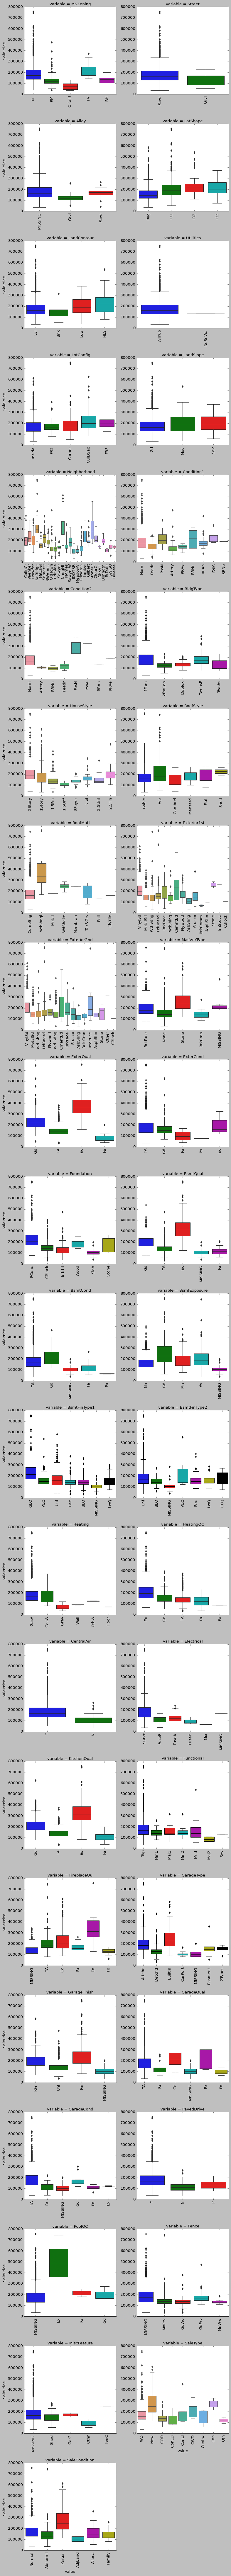

In [122]:
categorical = [f for f in train.columns if train.dtypes[f] == 'object']   
train_copy = train.copy(True) 
getboxPlots(train_copy,'SalePrice', categorical)

## Findings

1. Street, which is the type of road access to the the property, with Pave tend to have more price.
2. ExterQual (exterior quality of the house) with excellent condition has more price. Same holds for BsmtQual, KichenQual, GarageQual and PoolQC.  
3. Houses with Central Air conditioning (CentralAir) has more price. 
4. Houses having PavedDrive are having more price.
5. Houses with Foundation of Poured Contrete has more price.


# Numerical Feature Transformations

<p>As we noticed from above Histograms that most of the Numerical Features do not obey the Gaussian Distribution so transforming the Numerical Variables might give us the boost in the performace of the models. Transformation will happen in the following steps</p>

1. We will be calculating the Skewness of Numberical Variables on the Training Dataset (train.csv). We will compute the Skewness of a column after dropping the missing values in it. 

2. We will filter out the Numerical Variables having Skewness greater than some threshhold say 0.75.

3. We will apply Log Transformation on all Numerical Variables in both the train and test files which are having the skewness greater than threshold.

In [123]:
# First we will combine the train and the test csv files
# We will be including all the rows from the files and columns from MSSubClass till SaleCondition
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [124]:
all_data.shape

(2919, 79)

In [125]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [126]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index # Getting the Numerical Features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) # Computing the Skewness of Columns

In [127]:
skewed_feats

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: float64

In [128]:
skewed_feats = skewed_feats[skewed_feats > 0.75] # Keeping only those having skewness greater than 0.75
skewed_feats = skewed_feats.index # Getting the columns in a separate list
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [129]:
all_data[skewed_feats] = np.log1p(all_data[skewed_feats]) #Applying the log transformation on the Chosen Numerical Features
all_data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


# Categorical Variable Encoding
<p>We will be using One Hot Encoding here for encoding the Categorical Variables.</p>

In [130]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


In [131]:
all_data = pd.get_dummies(all_data) # It automatically transforms the Categorical Variables

In [132]:
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


Notice how the SaleCondition which is having the possible values  Normal, Abnorml, AdjLand, Alloca, Family and Partial, is now split into 6 different columns with a value of 1 present in the respective column indicating its presence in the respective instance. 	


# Dealing with Missing Values

## Percentage of Missing Values

<p>This portion is about checking the percentage of missing values in all the columns of combined train and test files.</p>

In [133]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(all_data)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:20]

Percent of missing data


[('LotFrontage', 16.65),
 ('GarageYrBlt', 5.45),
 ('MasVnrArea', 0.79),
 ('BsmtFullBath', 0.07),
 ('BsmtHalfBath', 0.07),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.03),
 ('BsmtUnfSF', 0.03),
 ('TotalBsmtSF', 0.03),
 ('GarageCars', 0.03),
 ('GarageArea', 0.03),
 ('MSSubClass', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0)]

## Mean Imputation

Now we will replace the missing values with the mean of the respective columns.

In [134]:
all_data = all_data.fillna(all_data.mean())

In [135]:
missing = percent_missing(all_data)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:20]

Percent of missing data


[('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0)]

Now we can see that the percentage of missing values are zero.

# Modelling


## Train Test Split

In [136]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]] # Retrieving the rows for train from the all_data
X_test = all_data[train.shape[0]:] # Retrieving the rows for test from the all_data
y_train = train.SalePrice # Retrieving the output variable "SalePrice" of the train dataset 

In [137]:
X_train.shape, X_test.shape

((1460, 288), (1459, 288))

In [138]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [139]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.044522,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.317488,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,4.369448,9.208238,6,6,1998,1998,3.044522,6.401917,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,4.795791,3.784190,8.518392,8,5,1992,1992,0.000000,5.575949,0.000000,...,0,0,0,1,0,0,0,0,1,0


## Dummy Regressor Baseline

In [140]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)

DummyRegressor()

In [141]:
y_pred = dummy_reg.predict(X_train)

In [142]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
dummy_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(dummy_rmse)

79415.29188606751


## Multiple Linear Regression


In [143]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [144]:
y_pred = linear_reg.predict(X_train)

In [145]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
linear_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(linear_rmse)

22105.10920280242


## Ridge Regression

In [146]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [147]:
y_pred = ridge_reg.predict(X_train)

In [148]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
ridge_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(ridge_rmse)

22735.881643379453


## Lasso Regression

In [149]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.5,max_iter=10000)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.5, max_iter=10000)

In [150]:
y_pred = lasso_reg.predict(X_train)

In [151]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
lasso_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(lasso_rmse)

22230.28246760703


## Elastic Net Regression

In [152]:
from sklearn import linear_model
elastic_net_reg = linear_model.ElasticNet(l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)

ElasticNet()

In [153]:
y_pred = elastic_net_reg.predict(X_train)

In [154]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
elastic_net_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(elastic_net_rmse)

35064.113565684005


## Support Vector Regression

In [155]:
from sklearn.svm import SVR
svr_reg =  SVR(kernel="linear")
svr_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [156]:
y_pred = svr_reg.predict(X_train)

In [157]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
svr_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(svr_rmse)

55876.80522564981


## Nearest Neighbours Regression

In [158]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg =  KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [159]:
y_pred = knn_reg.predict(X_train)

In [160]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
svr_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(svr_rmse)

41750.59160354464


## Decision Tree Regression

In [161]:
from sklearn import tree
tree_reg =  tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [162]:
y_pred = tree_reg.predict(X_train)

In [163]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
tree_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(tree_rmse)

0.0


## Comparison 

<p>In all the above cases</p>

1. We trained the model on the training dataset and reported the performance of the model on the same dataset.

2. In real life, we train the model on the training dataset and test it on some test dataset(In our case it is X_test).

3. We will finalize our model based on how it performs on the unseen dataset which is the X_test dataset.

4. Now we will generate the predictions for the X_test dataset and submit the results to Kaggle. 

5. If we look at the performance on the training dataset then Decision Tree Regression seems to give us the good results. But this model should not be finalized, unless we know the performance of the model on the test dataset.

## Submission of Results to Kaggle

<p>Now we will generate the Submission files using each trained model and submit them on Kaggle. </p>


In [164]:
# This is the submission file provided by the Kaggle 
sample_submission = pd.read_csv("/usr/local/notebooks/datasets/Regression_Competition_Dataset/sample_submission.csv")
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [165]:
# Function to create the Download link to the Submissions
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [166]:
# Generating the Submission File Using Dummy Regression
sample_submission_dummy = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_dummy["SalePrice"] = dummy_reg.predict(X_test)
create_download_link(sample_submission_dummy, title="Download Dummy Regressor Submission", filename="sample_submission_dummy.csv")

In [167]:
# Generating the Submission File Using Linear Regression
sample_submission_linear = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_linear["SalePrice"] = linear_reg.predict(X_test)
create_download_link(sample_submission_linear, title="Download Linear Regression Submission", filename="sample_submission_linear.csv")

In [168]:
# Generating the Submission File Using Ridge Regression
sample_submission_ridge = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_ridge["SalePrice"] = ridge_reg.predict(X_test)
create_download_link(sample_submission_ridge, title="Download Ridge Regression Submission", filename="sample_submission_ridge.csv")

In [169]:
# Generating the Submission File Using Lasso Regression
sample_submission_lasso = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_lasso["SalePrice"] = lasso_reg.predict(X_test)
create_download_link(sample_submission_lasso, title="Download Lasso Regression Submission", filename="sample_submission_lasso.csv")

In [170]:
# Generating the Submission File Using Elastic Net Regression
sample_submission_elastic_net = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_elastic_net["SalePrice"] = elastic_net_reg.predict(X_test)
create_download_link(sample_submission_elastic_net, title="Download Elastic Net Regression Submission", filename="sample_submission_elastic_net.csv")

In [171]:
# Generating the Submission File Using Support Vector Regression
sample_submission_svr = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_svr["SalePrice"] = svr_reg.predict(X_test)
create_download_link(sample_submission_svr, title="Download Support Vector Regression Submission", filename="sample_submission_svr.csv")

In [172]:
# Generating the Submission File Using KNN
sample_submission_knn = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_knn["SalePrice"] = knn_reg.predict(X_test)
create_download_link(sample_submission_knn, title="Download KNN Regression Submission", filename="sample_submission_knn.csv")

In [173]:
# Generating the Submission File Using Decision Tree Regression
sample_submission_tree = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_tree["SalePrice"] = tree_reg.predict(X_test)
create_download_link(sample_submission_tree, title="Download Decision Tree Regression Submission", filename="sample_submission_tree.csv")

# Submission Results

Submission of above files on Kaggle gave us the following results on Public Leaderboard.
1. Dummy Regressor (0.42577)
2. Multiple Linear Regressor (0.55048)
3. Ridge Regressor (0.20693)
4. Lasso Regressor (0.24409)
5. ElasticNet Regressor (0.18450)
6. Support Vector Regressor (0.26048)
7. K-Nearest Neighbour Regressor (0.25936)
8. Decision Tree Regressor (0.20245)


## Conclusion

We can see that the ElasticNet Regressor gives us the best results on the test dataset then all the other models. Decision Tree Regressor which tend to have a error of zero on the training dataset, doesn't performs that much good on the test dataset. This situation is called Overfitting. 

# Ideas to Try

1. Trying out the Feature Selection Techniques like Recursive Feature Elimination can surely boost the performance.

2. Features pointed out in the Exploratory Data Analysis part of the code above (Numerical and Categorical Variables analysis) can surely boost the performance. If used as pointed above.

3. Feature Importance can be calculated using the Scikit Learn's library using each model. This has been left as an excercise for the readers. 


# Cross Validation and  HyperParameter Optimization

<p>The performance of above models can be improved in several ways.</p>

1. We can do the process of cross validation as we saw in the lessons and report the average performace (error) of the models across different splits. We will be looking into the working of it in the chapter of Classification. 

2. We can do a search on the hyperparameters like $\alpha$ for Linear, Ridge, Lasso Regressions. These advance searches include RandomSearch and GridSearch. We will be looking into the detail of their working in the chapter of Classification and how they can be used to find the optimal parameters for the respective models. 